Fuente: https://github.com/esansano/decharlas_deep_learning

https://medium.com/metadatos/todo-lo-que-necesitas-saber-sobre-el-descenso-del-gradiente-aplicado-a-redes-neuronales-19bdbb706a78

Jugando con rrnn
http://playground.tensorflow.org/

Epoch: 1, Loss: 2.447756, Accuracy: 0.650000
Epoch: 2, Loss: 1.865683, Accuracy: 0.783622
Epoch: 3, Loss: 1.520135, Accuracy: 0.819697
Epoch: 4, Loss: 1.240925, Accuracy: 0.848052
Epoch: 5, Loss: 1.063838, Accuracy: 0.861472
Epoch: 6, Loss: 0.914874, Accuracy: 0.880231
Epoch: 7, Loss: 0.787355, Accuracy: 0.896898
Epoch: 8, Loss: 0.700557, Accuracy: 0.898341
Epoch: 9, Loss: 0.647361, Accuracy: 0.908009
Epoch: 10, Loss: 0.590711, Accuracy: 0.912626
Epoch: 11, Loss: 0.552806, Accuracy: 0.917893
Epoch: 12, Loss: 0.520310, Accuracy: 0.921429
Epoch: 13, Loss: 0.492460, Accuracy: 0.924820
Epoch: 14, Loss: 0.468553, Accuracy: 0.928788
Epoch: 15, Loss: 0.447193, Accuracy: 0.931457
Epoch: 16, Loss: 0.428054, Accuracy: 0.934055
Epoch: 17, Loss: 0.410681, Accuracy: 0.935786
Epoch: 18, Loss: 0.394872, Accuracy: 0.938167
Epoch: 19, Loss: 0.380557, Accuracy: 0.940548
Epoch: 20, Loss: 0.367064, Accuracy: 0.942352
Epoch: 21, Loss: 0.355019, Accuracy: 0.943939
Epoch: 22, Loss: 0.343176, Accuracy: 0.9458

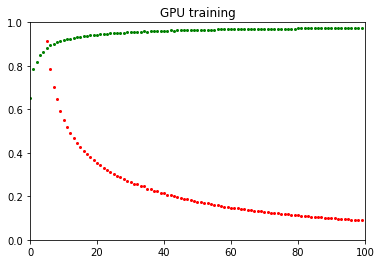

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

torch.manual_seed(0)

# Load data
train = pd.read_csv('https://raw.githubusercontent.com/esansano/decharlas_deep_learning/master/train.csv', header=0).values
x = train[:, 1:] / 255.0
y = train[:, 0]
enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1, 1)).toarray()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# Neural network dimensions
in_dim = x_train.shape[1]
hid_dim_1 = 1000
hid_dim_2 = 500
hid_dim_3 = 100
out_dim = 10

# Batch size
batch = 1000

# Training data
x = Variable(torch.from_numpy(x_train), requires_grad=False).type(torch.FloatTensor).cuda()
y = Variable(torch.from_numpy(y_train), requires_grad=False).type(torch.FloatTensor).cuda()

# Test data
xt = Variable(torch.from_numpy(x_test), requires_grad=False).type(torch.FloatTensor).cuda()

# Model definition
model = torch.nn.Sequential(
    torch.nn.Linear(in_dim, hid_dim_1),
    torch.nn.ReLU(),
    torch.nn.Linear(hid_dim_1, hid_dim_2),
    torch.nn.ReLU(),
    torch.nn.Linear(hid_dim_2, hid_dim_3),
    torch.nn.ReLU(),
    torch.nn.Linear(hid_dim_3, out_dim)
).cuda()

# Loss function
criterion = torch.nn.MSELoss().cuda()

# Optimization function
learning_rate = 1
optimizer = torch.optim.SGD(model.parameters(), learning_rate)
loss_list = []
acc_list = []
max_epochs = 100

for epoch in range(max_epochs):

    epoch_loss = 0

    for i in range(0, x.size()[0], batch):
        # Forward pass
        y_pred = model(x[i:(i+batch), :])
        loss = criterion(y_pred, y[i:(i+batch), :])
#        epoch_loss += loss.data[0]
        epoch_loss += loss.data.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Update weights
        optimizer.step()

    # Test accuracy
    yt_pred = model(xt).data.cpu().numpy()
    accuracy = np.sum(np.argmax(y_test, axis=1) == np.argmax(yt_pred, axis=1)) / yt_pred.shape[0]

    print('Epoch: %d, Loss: %f, Accuracy: %f' % (epoch + 1, epoch_loss, accuracy))
    loss_list.append(epoch_loss)
    acc_list.append(accuracy)

# Plot loss and accuracy
plt.scatter(range(max_epochs), acc_list, c=['green'], s=4)
plt.scatter(range(max_epochs), loss_list, c=['red'], s=4)
plt.title('GPU training')
plt.axis([0, max_epochs, 0, 1])
plt.show()

numpy


In [ ]:
import numpy as np
np.random.seed(0)

# Tensor dimensions
d1, d2 = 4, 5

# Initialize three tensors
t1 = np.random.rand(d1, d2)
t2 = np.random.rand(d1, d2)
t3 = np.random.rand(d1, d2)

# Computational graph
a = t1 + t2
b = a * t3
c = np.sum(b) # 8.80812307798

grad_c = 1.0
grad_b = grad_c * np.ones((d1, d2))
grad_a = grad_b * t3
grad_t3 = grad_b * a
grad_t1 = grad_a.copy()
grad_t2 = grad_a.copy()
grad_t1,grad_t2,grad_t3

(array([[0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672],
        [0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077],
        [0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676],
        [0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559]]),
 array([[0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672],
        [0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077],
        [0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676],
        [0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559]]),
 array([[1.52743185, 1.51434793, 1.06424274, 1.32541236, 0.54192923],
        [1.28581513, 0.5809405 , 1.83644192, 1.48551108, 0.79810346],
        [1.05628065, 1.30312861, 1.02419489, 1.49403059, 0.08982586],
        [0.7047648 , 0.63231412, 1.44955384, 1.72190483, 1.55183245]]))

torch


In [ ]:
import torch
from torch.autograd import Variable
torch.manual_seed(0)

# Tensor dimensions
d1, d2 = 4, 5

# Computational graph definition with Variables
t1 = Variable(torch.randn(d1, d2), requires_grad=True)
t2 = Variable(torch.randn(d1, d2), requires_grad=True)
t3 = Variable(torch.randn(d1, d2), requires_grad=True)
a = t1 + t2
b = a * t3
c = torch.sum(b)

# Gradient computation
c.backward()

grad_t1 = t1.grad.data
grad_t2 = t2.grad.data
grad_t3 = t3.grad.data
grad_t1,grad_t2,grad_t3

(tensor([[ 1.5091,  2.0820,  1.7067,  2.3804,  1.9415],
         [ 0.7915, -0.0203, -0.4372,  1.6459, -1.3602],
         [ 0.3446,  0.5199, -0.3656, -1.3024,  0.0994],
         [ 0.4418,  0.2469,  0.0769,  0.3380,  0.4544]]),
 tensor([[ 1.5091,  2.0820,  1.7067,  2.3804,  1.9415],
         [ 0.7915, -0.0203, -0.4372,  1.6459, -1.3602],
         [ 0.3446,  0.5199, -0.3656, -1.3024,  0.0994],
         [ 0.4418,  0.2469,  0.0769,  0.3380,  0.4544]]),
 tensor([[-0.6861, -1.0399,  0.3902,  0.0073,  0.8044],
         [-2.0054, -0.9144,  1.2976,  1.0624,  1.3842],
         [ 1.9510, -0.3250,  0.0640,  1.7749,  0.8772],
         [-1.3386, -0.5641,  1.0652,  2.4505,  1.3790]]))

tensorflow


In [ ]:
import numpy as np
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
np.random.seed(0)

# Tensor dimensions
d1, d2 = 4, 5

# Computational graph definition
t1 = tf.placeholder(tf.float32)
t2 = tf.placeholder(tf.float32)
t3 = tf.placeholder(tf.float32)
a = t1 + t2
b = a * t3
c = tf.reduce_sum(b)

# Gradients computation definition
grad_t1, grad_t2, grad_t3 = tf.gradients(c, [t1, t2, t3])

with tf.Session() as sess:
    values = {
        t1: np.random.rand(d1, d2),
        t2: np.random.rand(d1, d2),
        t3: np.random.rand(d1, d2),
    }
    out = sess.run([c, grad_t1, grad_t2, grad_t3], feed_dict=values)

    c_val, grad_t1_val, grad_t2_val, grad_t3_val = out

Instructions for updating:
non-resource variables are not supported in the long term


keras

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2992 - acc: 0.9119
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1461 - acc: 0.9569
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1076 - acc: 0.9676
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0886 - acc: 0.9728
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0744 - acc: 0.9762


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[0.07638371645715088, 0.9761]

In [ ]:
  
import torch
from torch.autograd import Variable
torch.manual_seed(0)

# Neural network dimensions
n, in_dim, hid_dim, out_dim = 50, 100, 500, 10

# Training data
x = Variable(torch.randn(n, in_dim), requires_grad=False)
y = Variable(torch.randn(n, out_dim), requires_grad=False)

# Model definition
model = torch.nn.Sequential(
    torch.nn.Linear(in_dim, hid_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(hid_dim, out_dim)
)

# Loss function
criterion = torch.nn.MSELoss()

# Optimization function
learning_rate = 1e-6
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

for epoch in range(500):

    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()
    print(epoch,loss)

0 tensor(0.9514, grad_fn=<MseLossBackward>)
1 tensor(0.9514, grad_fn=<MseLossBackward>)
2 tensor(0.9514, grad_fn=<MseLossBackward>)
3 tensor(0.9514, grad_fn=<MseLossBackward>)
4 tensor(0.9514, grad_fn=<MseLossBackward>)
5 tensor(0.9514, grad_fn=<MseLossBackward>)
6 tensor(0.9513, grad_fn=<MseLossBackward>)
7 tensor(0.9513, grad_fn=<MseLossBackward>)
8 tensor(0.9513, grad_fn=<MseLossBackward>)
9 tensor(0.9513, grad_fn=<MseLossBackward>)
10 tensor(0.9513, grad_fn=<MseLossBackward>)
11 tensor(0.9513, grad_fn=<MseLossBackward>)
12 tensor(0.9513, grad_fn=<MseLossBackward>)
13 tensor(0.9513, grad_fn=<MseLossBackward>)
14 tensor(0.9513, grad_fn=<MseLossBackward>)
15 tensor(0.9513, grad_fn=<MseLossBackward>)
16 tensor(0.9513, grad_fn=<MseLossBackward>)
17 tensor(0.9513, grad_fn=<MseLossBackward>)
18 tensor(0.9513, grad_fn=<MseLossBackward>)
19 tensor(0.9513, grad_fn=<MseLossBackward>)
20 tensor(0.9513, grad_fn=<MseLossBackward>)
21 tensor(0.9513, grad_fn=<MseLossBackward>)
22 tensor(0.9513, gr